## Problem Statement
The following dataset is used to classify the car acceptability into classes: unacceptable, acceptable, good and very good.

1. Import the data dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/car/
2. Extract X as all columns except the last column and Y as last column
3. Visualize the dataset using any two appropriate graphs
4. Visualize the correlation between all the variables of dataset
5. Split the data into training set and testing set. Perform 10-fold cross validation
6. Train a Logistic regression model for the dataset
7. Compute the accuracy and confusion matrix
8. Plot the decision boundary, visualize training and test results
9. Predict and display the class label of a car with following attributes : buying, maint, doors, persons, lug_boot,
 safety as [vhigh,low,4,more,small,med]

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<span style="color:blue"><b>Step 1: Importing data from the given url</b></span>

In [2]:
# Extract the dataset
col_names = ['buying_price','maintenance_price','num_doors','num_persons','luggage_boot_space','safety','class_value']
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", names=col_names)
data.head()

,buying_price,maintenance_price,num_doors,num_persons,luggage_boot_space,safety,class_value
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<span style="color:blue"><b>Step 3: Visualizing data using 2 graphs</b></span>

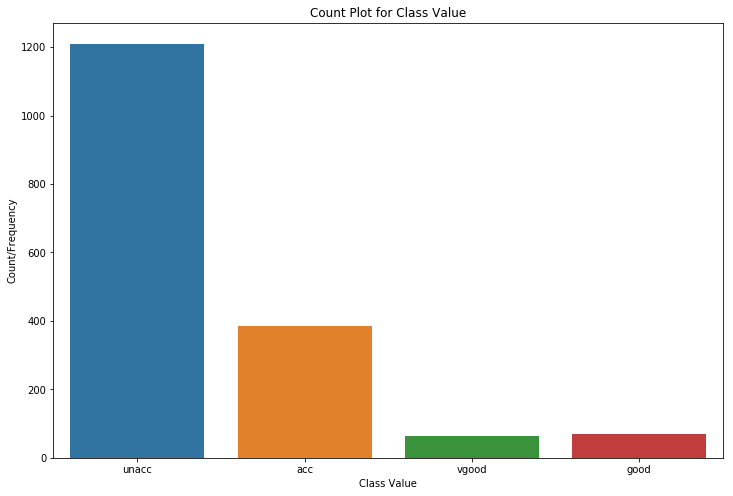

In [3]:
# Display count for each class
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

ax = sns.countplot(data.class_value)
ax.set(xlabel="Class Value", ylabel="Count/Frequency", title="Count Plot for Class Value")
plt.show()

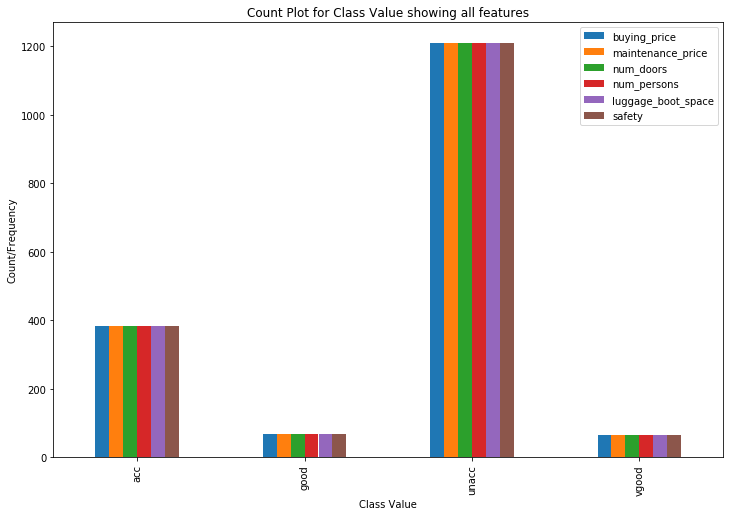

In [4]:
# Display features' count for each class
ax = data.groupby("class_value").count().plot(kind='bar', figsize=(12,8))
ax.set(xlabel="Class Value", ylabel="Count/Frequency", title="Count Plot for Class Value showing all features")
plt.show()

#### Preprocessing

In [5]:
# Create mapping for categorical features to convert text to ordinal data
map_buying_price = {'low':1, 'med':2, 'high':3, 'vhigh':4}
map_maintenance_price = {'low':1, 'med':2, 'high':3, 'vhigh':4}
map_num_doors = {'2':1, '3':2, '4':3, '5more':4}
map_num_persons = {'2':1, '4':2, 'more':3}
map_luggage_boot_space = {'small':1, 'med':2, 'big':3}
map_safety = {'low':1, 'med':2, 'high':3}
class_value_map = {'unacc':1,'acc':2,'good':3,'vgood':4}

data['buying_price_mapped'] = data.buying_price.map(map_buying_price)
data['maintenance_price_mapped'] = data.maintenance_price.map(map_maintenance_price)
data['num_doors_mapped'] = data.num_doors.map(map_num_doors)
data['num_persons_mapped'] = data.num_persons.map(map_num_persons)
data['luggage_boot_space_mapped'] = data.luggage_boot_space.map(map_luggage_boot_space)
data['safety_mapped'] = data.safety.map(map_safety)

data.sample(5)

,buying_price,maintenance_price,num_doors,num_persons,luggage_boot_space,safety,class_value,buying_price_mapped,maintenance_price_mapped,num_doors_mapped,num_persons_mapped,luggage_boot_space_mapped,safety_mapped
269,vhigh,med,3,more,big,high,acc,4,2,2,3,3,3
611,high,high,4,4,big,high,acc,3,3,3,2,3,3
1354,low,vhigh,4,2,med,med,unacc,1,4,3,1,2,2
1201,med,low,2,4,med,med,acc,2,1,1,2,2,2
1696,low,low,4,more,med,med,good,1,1,3,3,2,2


In [6]:
# Choosing only the ordinal columns and the target variable in the dataframe
cols = ['buying_price_mapped',
        'maintenance_price_mapped',
        'num_doors_mapped',
        'num_persons_mapped',
        'luggage_boot_space_mapped',
        'safety_mapped',
        'class_value']

data = data[cols]

<span style="color:blue"><b>Step 4: Visualizing the correlation</b></span>

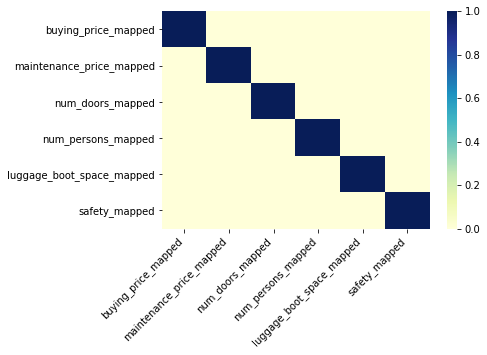

In [7]:
# Since the data is ordinal, we are using Spearman Rank Correlation and plot as a heatmap on graph

ax = sns.heatmap(data.corr(method='spearman'), cmap="YlGnBu")
ax.yaxis.set_ticklabels(ax.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)

plt.show()

<span style="color:blue"><b>Step 2: Splitting the data in X and Y</b></span>

In [8]:
# Split X and Y variables as features and target variable

X = data.iloc[:, :-1]
Y = data.iloc[:, -1:]

<div style="color:blue"><b>Step 5, 6, 7:<ul><li>Splitting the data in train and test.</li><li>Using 10-fold cross validation.</li><li>Training a logistic regression model</li><li>Computing the accuracy and confusion matrix.<ul></b></div>

In [9]:
# Train the model using 10 Fold Cross Validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

i = 0
accuracy = {}
confusionmatrix = {}

for train_idx, test_idx in KFold(n_splits=10, shuffle=True).split(X):
    X_train, X_test, Y_train, Y_test = X.iloc[train_idx], X.iloc[test_idx], Y.iloc[train_idx], Y.iloc[test_idx]
    lr = LogisticRegression()
    model = lr.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    accuracy[i] = accuracy_score(Y_test, Y_pred)
    confusionmatrix[i] = confusion_matrix(Y_test, Y_pred, labels=['unacc','acc','good','vgood'])
    i += 1

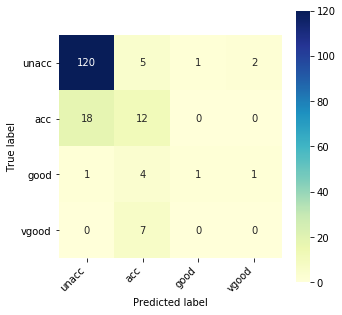

In [10]:
# Plot Confusion Matrix for one of the model using a heatmap
df_cm = pd.DataFrame(confusionmatrix[9], 
                     index=['unacc','acc','good','vgood'], 
                     columns=['unacc','acc','good','vgood']
                    )

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(1,1,1)
try:
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu", square=True, ax=ax)
except ValueError:
    raise ValueError("Confusion matrix values must be integers.")
    
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [11]:
# Mean accuracy of the model

mean_accuracy = np.array([accuracy[k] for k in accuracy]).mean()
print("Mean Accuracy of model is % s" % mean_accuracy)

Mean Accuracy of model is 0.7829883048796882


<div style="color:blue"><b>Step 8: Due to the nature of the data we aren't able to plot decision boundaries. So, as suggested by faculty, displaying the scatter plot.</b></div>

AttributeError: Unknown property ticks

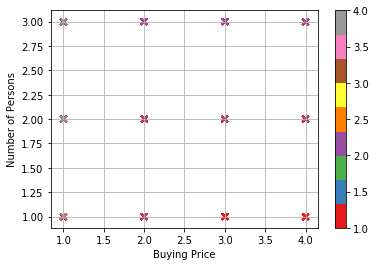

In [12]:
# Plot Decision Boundary - Below plot shows different class_value (in different colours)

plt.scatter(data['buying_price_mapped'], 
            data['num_persons_mapped'],
            c=np.vectorize(class_value_map.get)(model.predict(X.values)),
            marker='x',
            cmap='Set1'
           )

plt.colorbar()
plt.grid()
plt.xlabel('Buying Price')
plt.ylabel('Number of Persons')
plt.xticks(ticks=[1,2,3,4], labels=['low','med','high','vhigh'])
plt.yticks(ticks=[1,2,3], labels=['2','4','more'])
plt.show()

<div style="color:blue"><b>Step 9: Predicting and displaying the class label for given data</b></div>

In [ ]:
# Prediction for a given set of data

input_data = {
    'buying_price':'vhigh', 
    'maintenance_price': 'low', 
    'num_doors': '4',
    'num_persons': 'more', 
    'luggage_boot_space': 'small', 
    'safety': 'med'
}

df = pd.DataFrame(input_data, index=[0])

df['buying_price'] = df.buying_price.map(map_buying_price)
df['maintenance_price'] = df.maintenance_price.map(map_maintenance_price)
df['num_doors'] = df.num_doors.map(map_num_doors)
df['num_persons'] = df.num_persons.map(map_num_persons)
df['luggage_boot_space'] = df.luggage_boot_space.map(map_luggage_boot_space)
df['safety'] = df.safety.map(map_safety)

prediction = (model.predict(df.values))

print("Class Value of given data: % s" % prediction[0])